In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
asmr_data = pd.read_csv('./floating_points_asmr_short.csv')
asmr_data

,floating-point
0,0.8
1,0.5
2,0.1
3,0.1
4,0.6
...,...
9995,0.6
9996,0.5
9997,0.6
9998,0.9


In [23]:
outlines_data = pd.read_csv('./floating_points_outlines_short.csv')
outlines_data

,floating-point
0,0.0
1,0.4
2,0.1
3,0.5
4,0.1
...,...
9995,0.0
9996,0.3
9997,0.0
9998,0.0


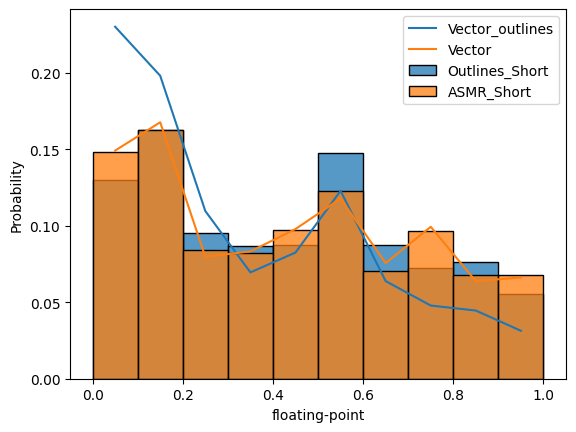

In [44]:
#create histogram of the data using seaborn
import seaborn as sns
sns.histplot(outlines_data['floating-point'], bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], stat = 'probability', label = 'Outlines_Short')
sns.histplot(asmr_data['floating-point'], bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], stat = 'probability', label = 'ASMR_Short')
vector = [0.14911224109034746, 0.167618143980676, 0.07968686276054647, 0.08318046421449964, 0.09785064397100085, 0.1177426055066604, 0.07556352276936439, 0.09928243209341206, 0.06373532861648695, 0.0662277549970058]
#plot the vector data

vector_gpt2 = [0.14911224109034746, 0.167618143980676, 0.07968686276054647, 0.08318046421449964, 0.09785064397100085, 0.1177426055066604, 0.07556352276936439, 0.09928243209341206, 0.06373532861648695, 0.0662277549970058]

vector_outlines = [0.23007222959022572, 0.19802016434515582, 0.10961856954868467, 0.06949994934222854, 0.08247846927694481, 0.12280258473101548, 0.06379572044974383, 0.04783476670884266, 0.04455289983617329, 0.031324646170985175]

plt.plot([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], vector_outlines, label = 'Vector_outlines')
plt.plot([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], vector_gpt2, label = 'Vector')

plt.legend()



<Axes: xlabel='floating-point', ylabel='Count'>

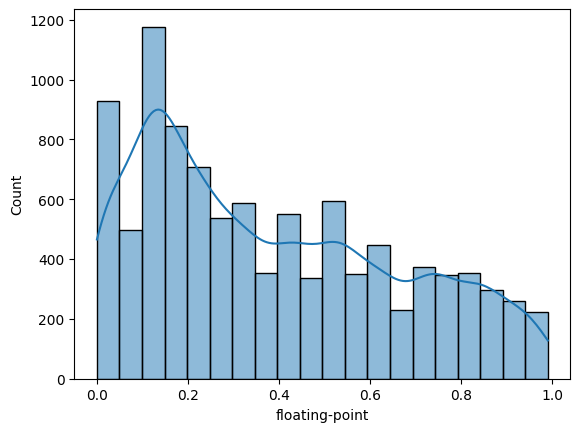

In [5]:
#create histogram of the data using seaborn
import seaborn as sns
sns.histplot(outlines_data['floating-point'], bins=20, kde=True)


In [15]:
import numpy as np
from scipy.stats import wasserstein_distance

# Generar dos muestras de puntos flotantes

# Calcular la distancia de Earth Mover's
distancia_em = wasserstein_distance(asmr_data["floating-point"].values, outlines_data["floating-point"].values)

# Imprimir la distancia
print("Distancia de Earth Mover's entre las distribuciones:", distancia_em)


Distancia de Earth Mover's entre las distribuciones: 0.034821000000000005


In [16]:
muestra_outlines = outlines_data["floating-point"].values
muestra_asmr = asmr_data["floating-point"].values

/tmp/ipykernel_3707/3083518320.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(muestra_outlines, label='Outlines', color='blue', shade=True)
/tmp/ipykernel_3707/3083518320.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(muestra_asmr, label='ASMR', color='orange', shade=True)


Estadística de Kolmogorov-Smirnov: 0.0835
P-valor: 9.708832376744617e-31


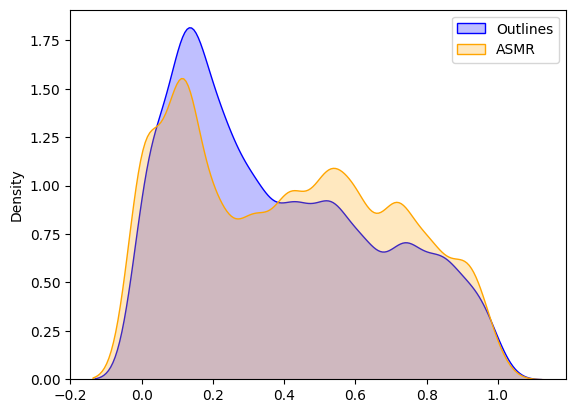

In [17]:
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp

# Generar dos muestras de puntos flotantes

# Dibujar gráfico de densidad
sns.kdeplot(muestra_outlines, label='Outlines', color='blue', shade=True)
sns.kdeplot(muestra_asmr, label='ASMR', color='orange', shade=True)

# Calcular el test de Kolmogorov-Smirnov
resultado_ks, p_valor = ks_2samp(muestra_outlines, muestra_asmr)

# Imprimir el resultado del test
print("Estadística de Kolmogorov-Smirnov:", resultado_ks)
print("P-valor:", p_valor)

# Agregar leyenda y mostrar el gráfico
import matplotlib.pyplot as plt
plt.legend()
plt.show()


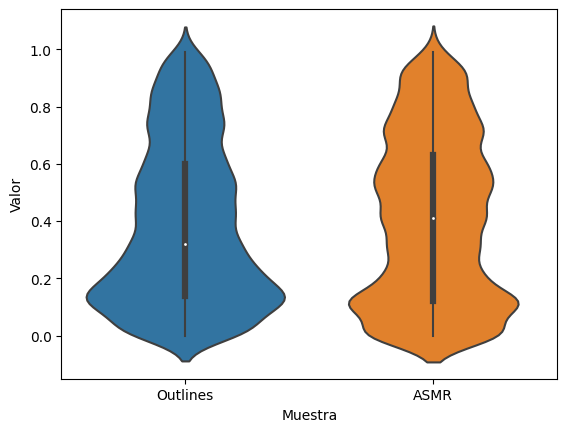

In [18]:
data = pd.DataFrame({
    'Muestra': np.concatenate([np.repeat('Outlines', len(muestra_outlines)), np.repeat('ASMR', len(muestra_asmr))]),
    'Valor': np.concatenate([muestra_outlines, muestra_asmr])
})

# Dibujar el gráfico de Violinplot
sns.violinplot(x='Muestra', y='Valor', data=data)

# Mostrar el gráfico
plt.show()

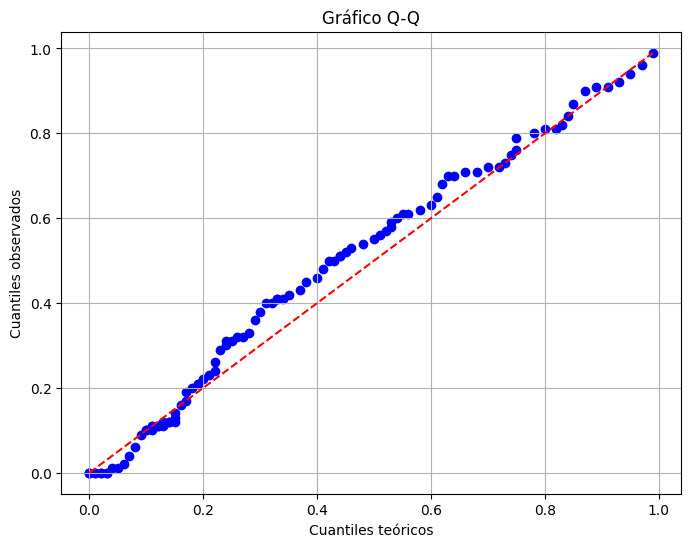

In [19]:
muestras_outlines_sorted = np.sort(muestra_outlines)
muestras_asmr_sorted = np.sort(muestra_asmr)

# Calcular los cuantiles teóricos para las muestras 1
cuantiles_teoricos = np.percentile(muestras_outlines_sorted, np.linspace(0, 100, 100))

# Calcular los cuantiles observados para las muestras 2
cuantiles_observados = np.percentile(muestras_asmr_sorted, np.linspace(0, 100, 100))

# Trazar el gráfico Q-Q
plt.figure(figsize=(8, 6))
plt.scatter(cuantiles_teoricos, cuantiles_observados, color='blue')
plt.plot([min(cuantiles_teoricos), max(cuantiles_teoricos)], [min(cuantiles_teoricos), max(cuantiles_teoricos)], color='red', linestyle='--')
plt.title('Gráfico Q-Q')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.grid(True)
plt.show()

In [20]:
from scipy.stats import chisquare
bins = np.linspace(min(min(muestra_outlines), min(muestra_asmr)), max(max(muestra_outlines), max(muestra_asmr)), 20)

# Calcular los histogramas normalizados de las dos muestras
hist1, _ = np.histogram(muestra_outlines, bins=bins, density=True)
hist2, _ = np.histogram(muestra_asmr, bins=bins, density=True)

# Realizar el test de chi cuadrado
estadistico_chi2, p_valor = chisquare(hist1, hist2)

# Imprimir el resultado del test
print("Estadístico Chi-cuadrado:", estadistico_chi2)
print("P-valor:", p_valor)
if p_valor < 0.05:
    print("Se rechaza la hipótesis nula: las distribuciones son diferentes.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que las distribuciones son diferentes.")

Estadístico Chi-cuadrado: 2.7940364640674176
P-valor: 0.9999839784330823
No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que las distribuciones son diferentes.
